In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install folium
import folium

In [3]:
oportunidades = pd.read_csv("/content/drive/My Drive/Datos/Entrenamieto_ECI_2020.csv")

In [4]:
#Todos están convertidos a USD, entonces esta columna la puedo sacar y documento que directamente ASP_(converted) es todo en USD
oportunidades['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [ ]:
oportunidades.loc[:, ['ASP_Currency', 'ASP', 'ASP_(converted)_Currency', 'ASP_(converted)', 'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount']]

,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Total_Taxable_Amount_Currency,Total_Taxable_Amount
0,EUR,0.5200,USD,0.58817,EUR,5272800.0
1,EUR,0.5300,USD,0.59948,EUR,48230.0
2,USD,0.4800,USD,0.48000,USD,83865.6
3,USD,0.5300,USD,0.53000,USD,7421881.5
4,USD,0.5300,USD,0.53000,USD,13357192.5
...,...,...,...,...,...,...
16942,EUR,0.5200,USD,0.58817,EUR,299715.0
16943,EUR,0.5200,USD,0.58817,EUR,299715.0
16944,EUR,0.5200,USD,0.58817,EUR,299715.0
16945,USD,0.6375,USD,0.63750,USD,0.0


In [ ]:
oportunidades.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,-1
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,-1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,-1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,-1
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,-1


In [ ]:
oportunidades.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,-1
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,-1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,-1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,-1
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,-1


In [ ]:
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
#oportunidades['Month'] = pd.to_datetime(oportunidades['Month'])
#oportunidades['Delivery_Year'] = pd.to_datetime(oportunidades['Delivery_Year'])


#Qué hacer con los None?
#oportunidades['Price'] = pd.to_numeric(oportunidades['Price'])

oportunidades['ASP'] = pd.to_numeric(oportunidades['ASP'])
oportunidades['ASP_(converted)'] = pd.to_numeric(oportunidades['ASP_(converted)'])
oportunidades['Total_Amount'] = pd.to_numeric(oportunidades['Total_Amount'])
oportunidades['Total_Taxable_Amount'] = pd.to_numeric(oportunidades['Total_Taxable_Amount'])

#Que hacer con los None?
#oportunidades['Sales_Contract_No'] = pd.to_numeric(oportunidades['Sales_Contract_No'])



In [ ]:
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [ ]:
len(oportunidades)

16947

In [ ]:
oportunidades.count()

ID                                    16947
Region                                16947
Territory                             16947
Pricing, Delivery_Terms_Quote_Appr    16947
Pricing, Delivery_Terms_Approved      16947
Bureaucratic_Code_0_Approval          16947
Bureaucratic_Code_0_Approved          16947
Submitted_for_Approval                16947
Bureaucratic_Code                     16947
Account_Created_Date                  16947
Source                                16947
Billing_Country                       16947
Account_Name                          16947
Opportunity_Name                      16947
Opportunity_ID                        16947
Sales_Contract_No                     16947
Account_Owner                         16947
Opportunity_Owner                     16947
Account_Type                          16947
Opportunity_Type                      16947
Quote_Type                            16947
Delivery_Terms                        16947
Opportunity_Created_Date        

In [ ]:
#veo que todosl los valores de Last_Activity son nulos
oportunidades['Last_Activity'].value_counts()

NaT    16947
Name: Last_Activity, dtype: int64

In [ ]:
oportunidades.drop(columns='Last_Activity', inplace=True)

In [ ]:
#veo que todos los valores de Actual_Delivery_Date son nulos
oportunidades['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [ ]:
oportunidades.drop(columns='Actual_Delivery_Date', inplace=True)

In [ ]:
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [ ]:
oportunidades.count()

ID                                    16947
Region                                16947
Territory                             16947
Pricing, Delivery_Terms_Quote_Appr    16947
Pricing, Delivery_Terms_Approved      16947
Bureaucratic_Code_0_Approval          16947
Bureaucratic_Code_0_Approved          16947
Submitted_for_Approval                16947
Bureaucratic_Code                     16947
Account_Created_Date                  16947
Source                                16947
Billing_Country                       16947
Account_Name                          16947
Opportunity_Name                      16947
Opportunity_ID                        16947
Sales_Contract_No                     16947
Account_Owner                         16947
Opportunity_Owner                     16947
Account_Type                          16947
Opportunity_Type                      16947
Quote_Type                            16947
Delivery_Terms                        16947
Opportunity_Created_Date        

In [ ]:
#columna Quote_Expiry_Date tiene muchos valores NaT

In [ ]:
oportunidades['Quote_Expiry_Date'].value_counts()

2017-06-30    436
2017-03-31    363
2017-09-30    225
2016-12-31    200
2017-10-31    171
             ... 
2018-12-20      1
2016-03-28      1
2016-01-04      1
2016-06-19      1
2016-10-23      1
Name: Quote_Expiry_Date, Length: 1002, dtype: int64

In [ ]:
oportunidades['Quote_Type'].value_counts()

Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64

In [ ]:
oportunidades['ASP'].value_counts()

0.38000    801
0.40000    712
0.36000    564
0.42000    510
0.39000    465
          ... 
0.34730      1
0.27400      1
0.25300      1
0.45789      1
0.24400      1
Name: ASP, Length: 301, dtype: int64

In [ ]:
oportunidades['ASP_(converted)'].value_counts()

0.38000    570
0.40000    497
0.36000    326
0.39000    325
0.00000    300
          ... 
0.32365      1
0.67868      1
0.43820      1
0.47300      1
0.30567      1
Name: ASP_(converted), Length: 441, dtype: int64

In [ ]:
oportunidades['Total_Amount'].value_counts()

6200.0        513
4400.0        461
18000.0       353
140000.0      272
1600.0        204
             ... 
193600.0        1
4972.8          1
8001840.0       1
12333750.0      1
11960.0         1
Name: Total_Amount, Length: 8872, dtype: int64

In [ ]:
#cantidad de TRF requeridas por país
cant_TRF_por_pais = oportunidades.groupby(['Billing_Country']).agg({'TRF':'sum'}).reset_index()
cant_TRF_por_pais

,Billing_Country,TRF
0,Albania,4
1,Argentina,1
2,Armenia,55
3,Australia,5577
4,Austria,43
...,...,...
75,Turkey,158
76,United Arab Emirates,647
77,United Kingdom,559
78,United States,15853


In [ ]:
#cantidad de dinero gastado en cada oportunidad
oportunidades.groupby('Opportunity_Name').agg({'Total_Taxable_Amount': 'sum'}).reset_index()

,Opportunity_Name,Total_Taxable_Amount
0,Opportunity_Name_0,2.446080e+07
1,Opportunity_Name_1,1.535170e+07
2,Opportunity_Name_100,5.437800e+05
3,Opportunity_Name_1000,1.421420e+08
4,Opportunity_Name_10000,0.000000e+00
...,...,...
9836,Opportunity_Name_9992,0.000000e+00
9837,Opportunity_Name_9995,2.086980e+06
9838,Opportunity_Name_9996,7.902469e+05
9839,Opportunity_Name_9997,3.799810e+06


In [ ]:
#inversiones de cada país
oportunidades.groupby(['Billing_Country']).agg({'Total_Taxable_Amount': 'sum'}).reset_index()

,Billing_Country,Total_Taxable_Amount
0,Albania,1.468530e+06
1,Argentina,2.356200e+05
2,Armenia,3.878873e+07
3,Australia,4.650773e+09
4,Austria,5.249600e+07
...,...,...
75,Turkey,1.634101e+08
76,United Arab Emirates,1.573925e+08
77,United Kingdom,5.070478e+08
78,United States,1.561297e+10


In [ ]:
#ninguna oportunidad fue enviada para aprobación
oportunidades['Submitted_for_Approval'].value_counts()

0    16947
Name: Submitted_for_Approval, dtype: int64

In [ ]:
#de acuerdo al código burocrático cuántas necesitan aprobación especial y cuántas son aprobadas
#se puede ver que las que requieren código 5 no son aprobadas nunca
aprobacion_por_codigo = oportunidades.groupby('Bureaucratic_Code').agg({'Pricing, Delivery_Terms_Quote_Appr':'sum', 'Pricing, Delivery_Terms_Approved': 'sum'}).reset_index()
col_aprobacion_por_codigo = {'Pricing, Delivery_Terms_Quote_Appr':'Quantity_Need_Pricing_Delivery_Appr', 'Pricing, Delivery_Terms_Approved':'Quantity_Pricing_Delivery_Approved'}
aprobacion_por_codigo.rename(columns=col_aprobacion_por_codigo)

,Bureaucratic_Code,Quantity_Need_Pricing_Delivery_Appr,Quantity_Pricing_Delivery_Approved
0,Bureaucratic_Code_0,42,42
1,Bureaucratic_Code_1,130,130
2,Bureaucratic_Code_2,234,234
3,Bureaucratic_Code_3,1,1
4,Bureaucratic_Code_4,9482,9482
5,Bureaucratic_Code_5,3803,0
6,Bureaucratic_Code_6,1,1


In [ ]:
#por pais, cantidad de aprobacion de codigo 0 que necesitan y cuantos son aprobados.
codigo_0 = oportunidades.groupby('Billing_Country').agg({'Bureaucratic_Code_0_Approval':'sum', 'Bureaucratic_Code_0_Approved':'sum'}).reset_index()
col_codigo_0 = {'Bureaucratic_Code_0_Approval':'Quantity_Need_Code_0_Approval', 'Bureaucratic_Code_0_Approved':'Quantity_Code_0_Approved'}
codigo_0.rename(columns=col_codigo_0)

,Billing_Country,Quantity_Need_Code_0_Approval,Quantity_Code_0_Approved
0,Albania,0,0
1,Argentina,0,0
2,Armenia,2,2
3,Australia,823,588
4,Austria,31,30
...,...,...,...
75,Turkey,17,12
76,United Arab Emirates,40,25
77,United Kingdom,152,127
78,United States,2136,1298


In [ ]:
#para cada país veo la cantidad de cada tipo de 'Stage' que hay. Me sirve para ver qué países llegan más a una negociación o a ganar una venta
group_by_country_and_stage = oportunidades.groupby(['Billing_Country', 'Stage']).agg({'Stage': lambda x: x.value_counts()})
columns_new = {'Stage':'Quantity_By_Stage'}
group_by_country_and_stage.rename(columns=columns_new, inplace=True)
group_by_country_and_stage.reset_index()

,Billing_Country,Stage,Quantity_By_Stage
0,Albania,Closed Lost,2
1,Argentina,Closed Lost,1
2,Armenia,Closed Lost,2
3,Australia,Closed Lost,470
4,Australia,Closed Won,695
...,...,...,...
142,United States,Closed Won,1755
143,United States,Negotiation,8
144,United States,Proposal,4
145,Viet Nam,Closed Lost,21


In [ ]:
oportunidades.groupby(['Billing_Country']).agg({'Total_Taxable_Amount': 'sum'}).reset_index()

,Billing_Country,Total_Taxable_Amount
0,Albania,1.468530e+06
1,Argentina,2.356200e+05
2,Armenia,3.878873e+07
3,Australia,4.650773e+09
4,Austria,5.249600e+07
...,...,...
75,Turkey,1.634101e+08
76,United Arab Emirates,1.573925e+08
77,United Kingdom,5.070478e+08
78,United States,1.561297e+10


In [ ]:
oportunidades['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [ ]:
es_Closed_Won = (oportunidades['Stage'] == 'Closed Won')

In [ ]:
#por pais cuántos closed won tengo
op_closed_won = oportunidades[es_Closed_Won].groupby(['Billing_Country']).agg({'Stage': lambda x: x.value_counts()}).reset_index()
col_op_closed_won = {'Stage':'Quantity_Closed_Won'}
op_closed_won.rename(columns=col_op_closed_won)

,Billing_Country,Quantity_Closed_Won
0,Australia,695
1,Austria,122
2,Bahrain,1
3,Belgium,119
4,Bulgaria,1
5,Cambodia,3
6,Canada,32
7,China,203
8,Cyprus,34
9,Czech Republic,3


In [ ]:
op_sin_pais_none = oportunidades.loc[oportunidades['Billing_Country'] != "None", :]
op_sin_pais_none

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,None,None,None,None,None,NaT,2016-01-19,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016 - 3,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type

In [ ]:
op_sin_pais_none['Billing_Country'].value_counts()

Japan                     4879
United States             3802
Germany                   1979
Australia                 1169
India                      672
                          ... 
Malaysia                     1
Bosnia and Herzegovina       1
Morocco                      1
Bangladesh                   1
Kenya                        1
Name: Billing_Country, Length: 79, dtype: int64

In [ ]:
lista_paises = pd.DataFrame({'Billing_Country': op_sin_pais_none['Billing_Country'].unique()})
lista_paises

,Billing_Country
0,Netherlands
1,United States
2,Japan
3,India
4,Italy
...,...
74,Bahrain
75,Estonia
76,Oman
77,Belarus


In [ ]:
op_closed_won

,Billing_Country,Stage
0,Australia,695
1,Austria,122
2,Bahrain,1
3,Belgium,119
4,Bulgaria,1
5,Cambodia,3
6,Canada,32
7,China,203
8,Cyprus,34
9,Czech Republic,3


In [ ]:
op_closed_won

,Billing_Country,Stage
0,Australia,695
1,Austria,122
2,Bahrain,1
3,Belgium,119
4,Bulgaria,1
5,Cambodia,3
6,Canada,32
7,China,203
8,Cyprus,34
9,Czech Republic,3


In [ ]:
len(op_sin_pais_none['Billing_Country'].unique())

79

In [ ]:
codigo_0 = codigo_0.loc[codigo_0['Billing_Country'] != "None", :]
codigo_0

,Billing_Country,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved
0,Albania,0,0
1,Argentina,0,0
2,Armenia,2,2
3,Australia,823,588
4,Austria,31,30
...,...,...,...
75,Turkey,17,12
76,United Arab Emirates,40,25
77,United Kingdom,152,127
78,United States,2136,1298


In [ ]:
op_para_grafico = codigo_0.merge(op_closed_won, how = 'right', left_on = 'Billing_Country', right_on='Billing_Country')

In [ ]:
op_closed_won['Stage'] = pd.to_numeric(op_closed_won['Stage'])

In [ ]:
len(codigo_0['Bureaucratic_Code_0_Approval'])

79

In [ ]:
len(op_closed_won['Stage'])

79

In [ ]:
len(codigo_0['Bureaucratic_Code_0_Approved'])

79

In [ ]:
op_para_grafico = op_para_grafico.nlargest(15, columns='Stage')

In [ ]:
op_para_grafico

,Billing_Country,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Stage
17,Japan,1221,721,3323
47,United States,2136,1298,1755
12,Germany,1060,745,1122
0,Australia,823,588,695
36,Singapore,211,142,318
26,Netherlands,277,201,315
14,India,425,296,284
7,China,196,184,203
38,Spain,157,137,192
16,Italy,129,108,152


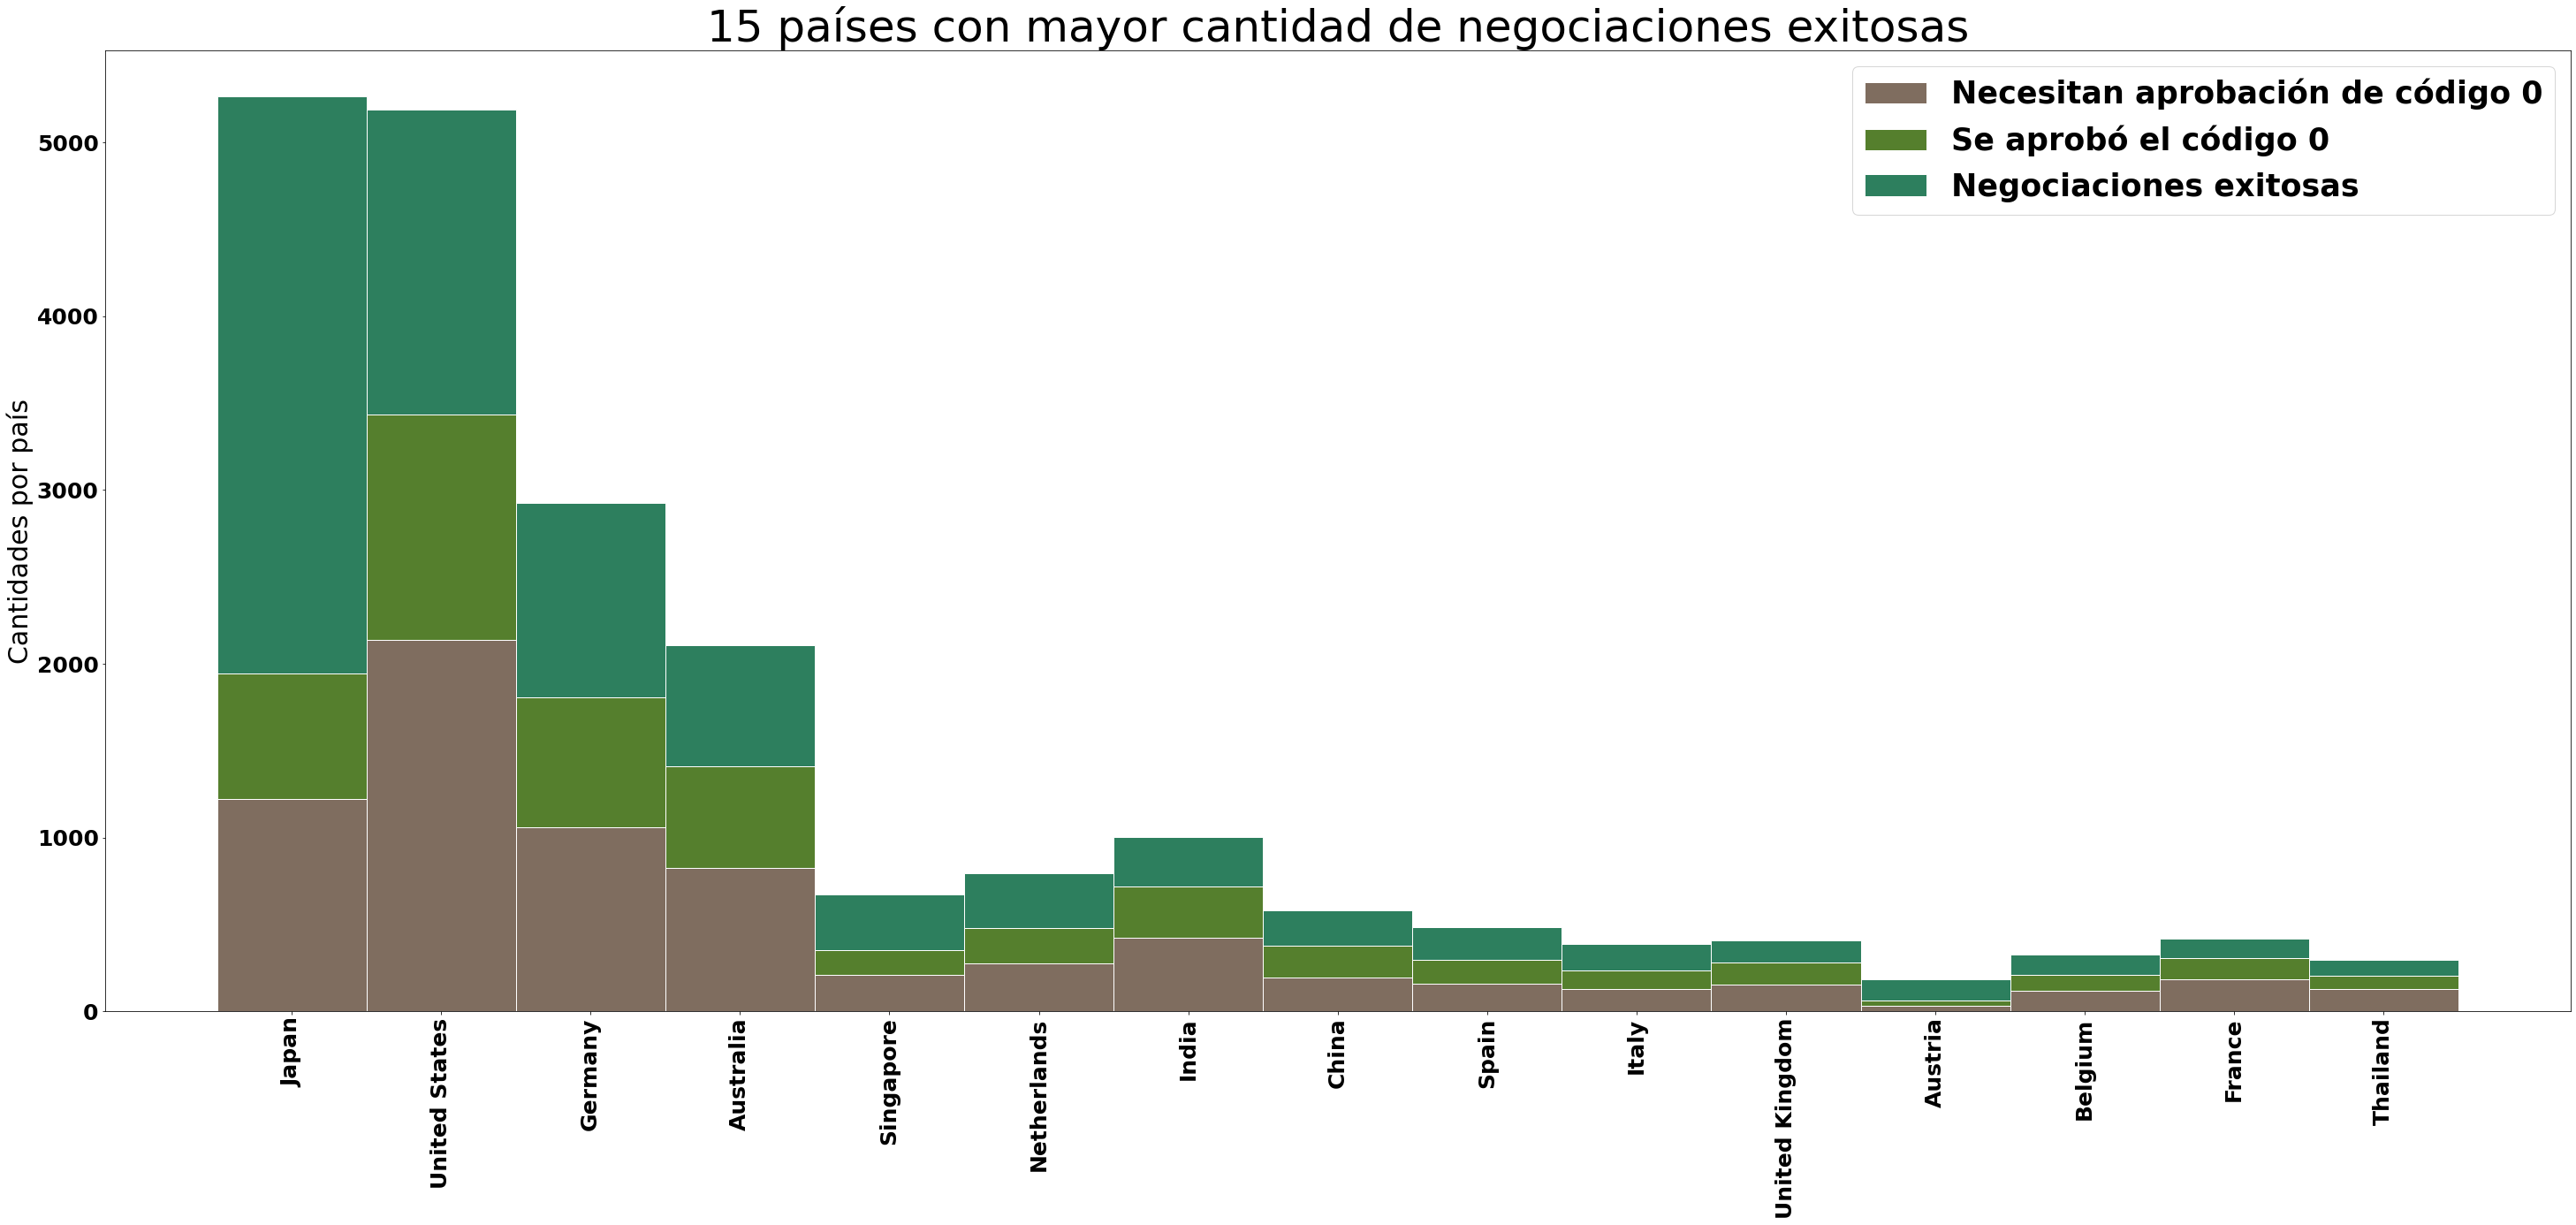

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

plt.figure(figsize=(50,20))
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = op_para_grafico['Bureaucratic_Code_0_Approval']
bars2 = op_para_grafico['Bureaucratic_Code_0_Approved']
bars3 = op_para_grafico['Stage']
 
# Heights of bars1 + bars2
bars = np.add(0, bars3).tolist()
 
# The position of the bars on the x-axis
r = op_para_grafico['Billing_Country'].unique()
#r = [0,1,2,3,4,5]
 
# Names of group and bar width
#names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth, label = 'Necesitan aprobación de código 0')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, color='#557f2d',bottom=bars1, edgecolor='white', width=barWidth, label = 'Se aprobó el código 0')
# Create green bars (top)
plt.bar(r, bars3, color='#2d7f5e',bottom=bars1+bars2, edgecolor='white', width=barWidth, label = 'Negociaciones exitosas')


# Custom X axis
plt.xticks(r, op_para_grafico['Billing_Country'].unique(), fontweight='bold', rotation=90, fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc="upper right", fontsize = 35)
plt.title("15 países con mayor cantidad de negociaciones exitosas", fontsize = 50)
plt.ylabel("Cantidades por país", fontsize = 30)
# Show graphic
plt.show()
